In [7]:
# Loading the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.applications import VGG16
from keras.models import Model
from keras.layers import GlobalAveragePooling2D

In [8]:
# Loading the dataset and preparing it for training
train_path = '../dataset_organized/train/'
test_path = '../dataset_organized/test/'

# Loading the dataset
import os
import cv2
from tqdm import tqdm

def load_images(path):

    X = []
    y = []

    for folder in os.listdir(path):
        files = os.listdir(path + folder)
        for file in tqdm(files):
            img = cv2.imread(path + folder + '/' + file)
            img = cv2.resize(img, (150, 150))
            X.append(img)
            y.append(folder)
    
    X = np.array(X)
    y = np.array(y)

    return X, y

X_train, y_train = load_images(train_path)
X_test, y_test = load_images(test_path)

classes_names = np.unique(y_train)

# Encoding the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# One hot encoding the target variable
y_train_encoded = to_categorical(y_train_encoded)
y_test_encoded = to_categorical(y_test_encoded)

# Splitting the training set into training and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_encoded, test_size=0.2, random_state=0)

# Normalizing the images
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

# Data Augmentation

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

100%|██████████| 74/74 [00:00<00:00, 1458.79it/s]


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,781,126 (56.39 MB)

 Trainable params: 66,438 (259.52 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/50


/Users/andreoliveira/Documents/GitHub/Projeto-CAA-1/venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2534 - loss: 1.7487

45/45 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.2544 - loss: 1.7467 - val_accuracy: 0.4463 - val_loss: 1.4208
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4521 - loss: 1.3999

45/45 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 0.4522 - loss: 1.3997 - val_accuracy: 0.5593 - val_loss: 1.2465
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4835 - loss: 1.3045

45/45 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.4840 - loss: 1.3035 - val_accuracy: 0.5932 - val_loss: 1.1461
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5451 - loss: 1.1720

45/45 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.5449 - loss: 1.1724 - val_accuracy: 0.5763 - val_loss: 1.1004
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5473 - loss: 1.1802

45/45 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.5478 - loss: 1.1794 - val_accuracy: 0.5960 - val_loss: 1.0486
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5401 - loss: 1.1232

45/45 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.5408 - loss: 1.1228 - val_accuracy: 0.6271 - val_loss: 1.0158
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6002 - loss: 1.0536

45/45 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.6002 - loss: 1.0537 - val_accuracy: 0.6441 - val_loss: 1.0073
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5788 - loss: 1.0660

45/45 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.5793 - loss: 1.0655 - val_accuracy: 0.6554 - val_loss: 0.9659
Epoch 9/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.5969 - loss: 1.0409 - val_accuracy: 0.6638 - val_loss: 0.9665
Epoch 10/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6319 - loss: 0.9865

45/45 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.6317 - loss: 0.9866 - val_accuracy: 0.6638 - val_loss: 0.9288
Epoch 11/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6229 - loss: 1.0009

45/45 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.6234 - loss: 1.0000 - val_accuracy: 0.6554 - val_loss: 0.9047
Epoch 12/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6571 - loss: 0.9289

45/45 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.6571 - loss: 0.9292 - val_accuracy: 0.6638 - val_loss: 0.8956
Epoch 13/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.6708 - loss: 0.9088 - val_accuracy: 0.6469 - val_loss: 0.9031
Epoch 14/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6949 - loss: 0.8855

45/45 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.6945 - loss: 0.8860 - val_accuracy: 0.6582 - val_loss: 0.8833
Epoch 15/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6408 - loss: 0.9228

45/45 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.6414 - loss: 0.9221 - val_accuracy: 0.6780 - val_loss: 0.8590
Epoch 16/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6438 - loss: 0.9101

45/45 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.6442 - loss: 0.9096 - val_accuracy: 0.6723 - val_loss: 0.8561
Epoch 17/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.6885 - loss: 0.8623 - val_accuracy: 0.6356 - val_loss: 0.9043
Epoch 18/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7044 - loss: 0.8101

45/45 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.7041 - loss: 0.8106 - val_accuracy: 0.6610 - val_loss: 0.8542
Epoch 19/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.7131 - loss: 0.8295 - val_accuracy: 0.6638 - val_loss: 0.8568
Epoch 20/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.6664 - loss: 0.8276 - val_accuracy: 0.6723 - val_loss: 0.8605
Epoch 21/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6695 - loss: 0.8474

45/45 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.6696 - loss: 0.8473 - val_accuracy: 0.6780 - val_loss: 0.8288
Epoch 22/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.6895 - loss: 0.8087 - val_accuracy: 0.6667 - val_loss: 0.8583
Epoch 23/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7133 - loss: 0.7972

45/45 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.7130 - loss: 0.7974 - val_accuracy: 0.6977 - val_loss: 0.8239
Epoch 24/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.7091 - loss: 0.8003 - val_accuracy: 0.6780 - val_loss: 0.8372
Epoch 25/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7015 - loss: 0.8271

45/45 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.7016 - loss: 0.8268 - val_accuracy: 0.6921 - val_loss: 0.8168
Epoch 26/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.7094 - loss: 0.8185 - val_accuracy: 0.6667 - val_loss: 0.8529
Epoch 27/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7272 - loss: 0.7998

45/45 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.7272 - loss: 0.7996 - val_accuracy: 0.6836 - val_loss: 0.8036
Epoch 28/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.7432 - loss: 0.7372 - val_accuracy: 0.6780 - val_loss: 0.8091
Epoch 29/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7078 - loss: 0.7649

45/45 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.7080 - loss: 0.7648 - val_accuracy: 0.6893 - val_loss: 0.7933
Epoch 30/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7165 - loss: 0.7817

45/45 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.7166 - loss: 0.7816 - val_accuracy: 0.6977 - val_loss: 0.7915
Epoch 31/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7522 - loss: 0.7329

45/45 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.7519 - loss: 0.7330 - val_accuracy: 0.7006 - val_loss: 0.7892
Epoch 32/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7282 - loss: 0.7135

45/45 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.7284 - loss: 0.7135 - val_accuracy: 0.7006 - val_loss: 0.7764
Epoch 33/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.7329 - loss: 0.7004 - val_accuracy: 0.7006 - val_loss: 0.7808
Epoch 34/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.7403 - loss: 0.7239 - val_accuracy: 0.7034 - val_loss: 0.7963
Epoch 35/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.7406 - loss: 0.7312 - val_accuracy: 0.6921 - val_loss: 0.8062
Epoch 36/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.7639 - loss: 0.6851 - val_accuracy: 0.6864 - val_loss: 0.7982
Epoch 37/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7342 - loss: 0.6979

45/45 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.7345 - loss: 0.6978 - val_accuracy: 0.6977 - val_loss: 0.7741
Epoch 38/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.7617 - loss: 0.6716 - val_accuracy: 0.7006 - val_loss: 0.7864
Epoch 39/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7267 - loss: 0.7369

45/45 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.7270 - loss: 0.7365 - val_accuracy: 0.7006 - val_loss: 0.7739
Epoch 40/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.7635 - loss: 0.6680 - val_accuracy: 0.7006 - val_loss: 0.7793
Epoch 41/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7700 - loss: 0.6303

45/45 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.7697 - loss: 0.6315 - val_accuracy: 0.7034 - val_loss: 0.7738
Epoch 42/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7692 - loss: 0.6531

45/45 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.7691 - loss: 0.6534 - val_accuracy: 0.7090 - val_loss: 0.7676
Epoch 43/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7698 - loss: 0.6801

45/45 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.7694 - loss: 0.6808 - val_accuracy: 0.7034 - val_loss: 0.7644
Epoch 44/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.7804 - loss: 0.6377 - val_accuracy: 0.6921 - val_loss: 0.7686
Epoch 45/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.7391 - loss: 0.6720 - val_accuracy: 0.7090 - val_loss: 0.7793
Epoch 46/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7648 - loss: 0.6382

45/45 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.7645 - loss: 0.6387 - val_accuracy: 0.7034 - val_loss: 0.7451
Epoch 47/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.8090 - loss: 0.6036 - val_accuracy: 0.6977 - val_loss: 0.7688
Epoch 48/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.7602 - loss: 0.6583 - val_accuracy: 0.6808 - val_loss: 0.8041
Epoch 49/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.7603 - loss: 0.6707 - val_accuracy: 0.7006 - val_loss: 0.7710
Epoch 50/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.7689 - loss: 0.6389 - val_accuracy: 0.7232 - val_loss: 0.7513


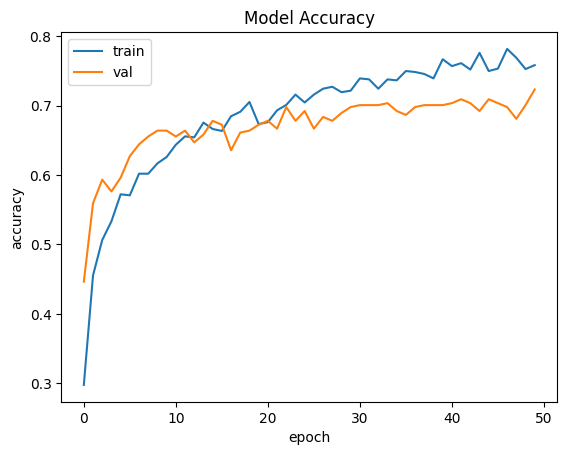

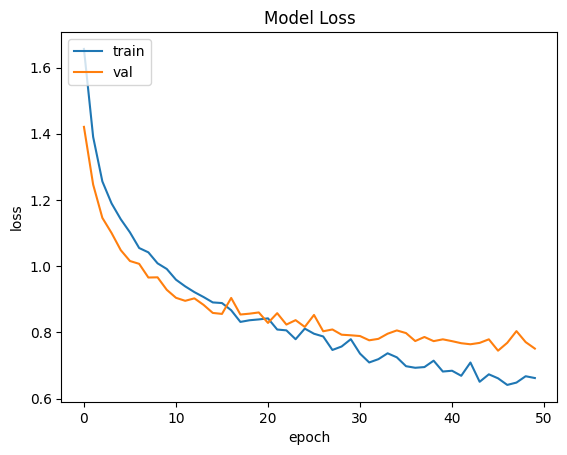

In [9]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(6, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint = ModelCheckpoint('vgg16_data_augmented.h5', save_best_only=True)

history = model.fit(datagen.flow(X_train, y_train, batch_size=32), validation_data=(X_val, y_val), epochs=50, callbacks=[early_stopping, model_checkpoint])

# Plotting the accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [10]:
# Loading the best model and evaluating it on the test set
from keras.models import load_model

model = load_model('vgg16_data_augmented.h5')

test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
predictions = model.predict(X_test)

print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

14/14 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.7844 - loss: 0.5943
14/14 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step
Test loss: 0.6898607611656189
Test accuracy: 0.7540603280067444


F1 Score:  0.7469480039137409
Precision:  0.7543430757655558
Recall:  0.7540603248259861
Accuracy:  0.7540603248259861


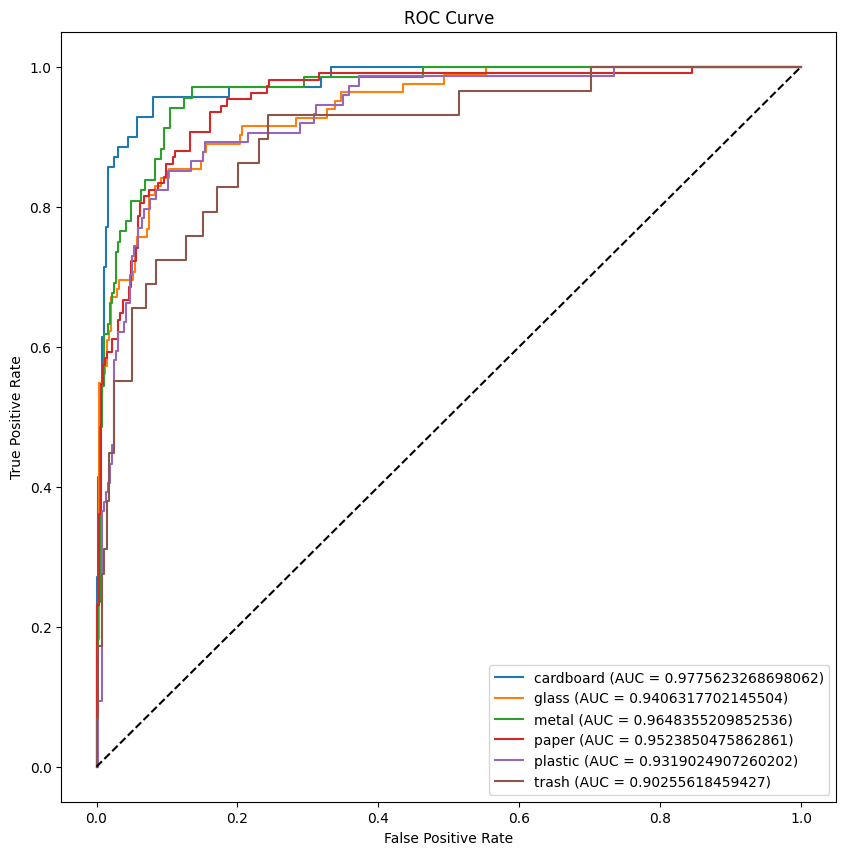

              precision    recall  f1-score   support

   cardboard       0.83      0.90      0.86        70
       glass       0.85      0.67      0.75        82
       metal       0.69      0.82      0.75        68
       paper       0.78      0.79      0.78       108
     plastic       0.67      0.78      0.72        74
       trash       0.57      0.28      0.37        29

    accuracy                           0.75       431
   macro avg       0.73      0.71      0.71       431
weighted avg       0.75      0.75      0.75       431



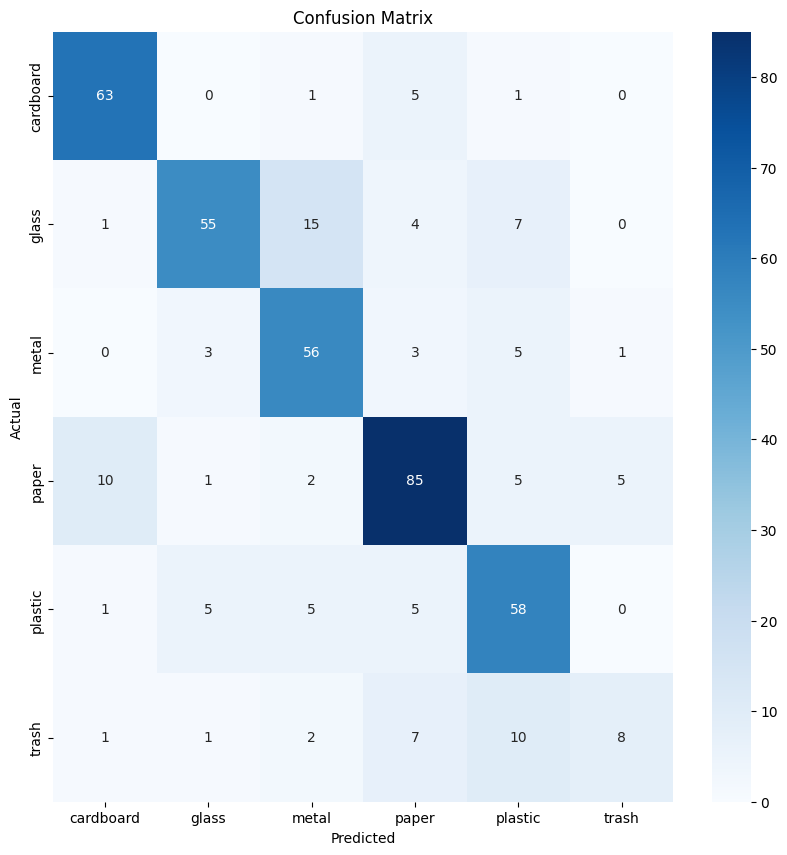

In [11]:
# Model Evaluation

# f1 score, precision, recall, accuracy, confusion matrix, classification report, and ROC curve

from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_curve, auc

# F1 Score
f1 = f1_score(np.argmax(y_test_encoded, axis=1), np.argmax(predictions, axis=1), average='weighted')
print("F1 Score: ", f1)

# Precision
precision = precision_score(np.argmax(y_test_encoded, axis=1), np.argmax(predictions, axis=1), average='weighted')
print("Precision: ", precision)

# Recall
recall = recall_score(np.argmax(y_test_encoded, axis=1), np.argmax(predictions, axis=1), average='weighted')
print("Recall: ", recall)

# Accuracy
accuracy = accuracy_score(np.argmax(y_test_encoded, axis=1), np.argmax(predictions, axis=1))
print("Accuracy: ", accuracy)

# ROC Curve
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(6):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 10))

for i in range(6):
    plt.plot(fpr[i], tpr[i], label=classes_names[i] + ' (AUC = ' + str(roc_auc[i]) + ')')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve')
plt.show()

# Classification Report
from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_test_encoded, axis=1), np.argmax(predictions, axis=1), target_names=classes_names))

# Confusion Matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(np.argmax(y_test_encoded, axis=1), np.argmax(predictions, axis=1))

plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes_names, yticklabels=classes_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


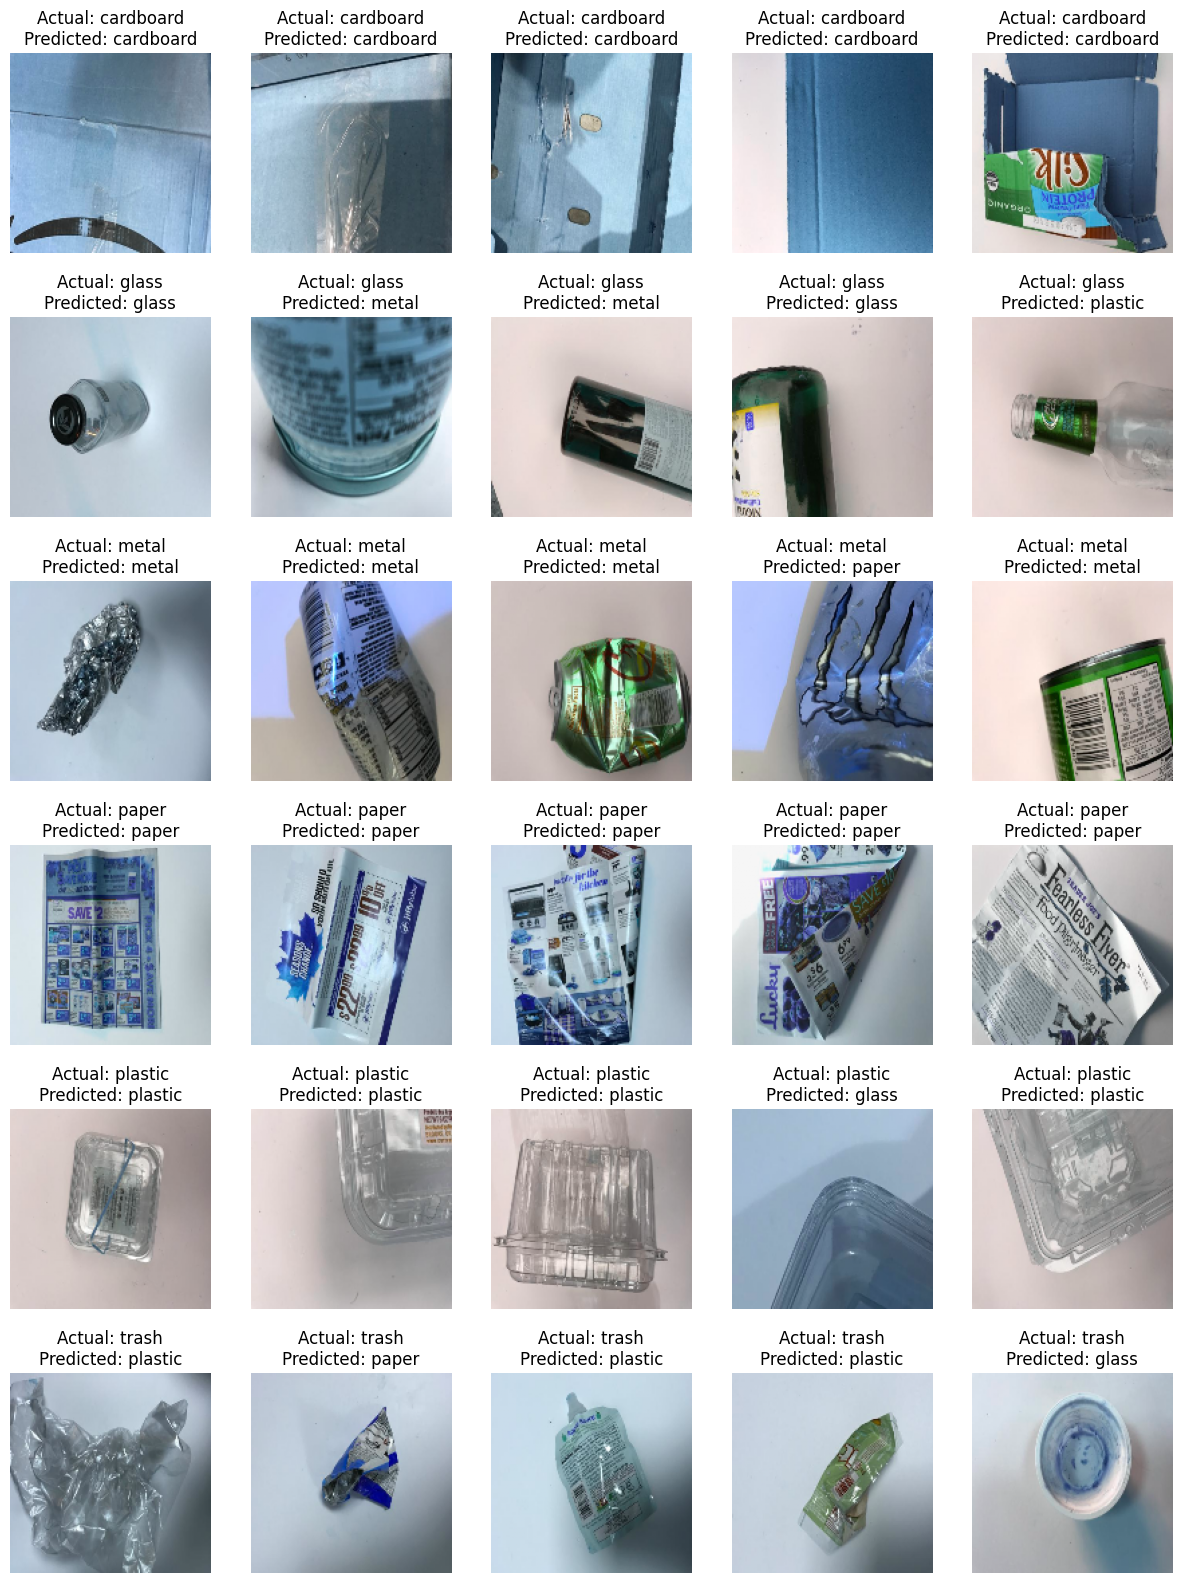

In [12]:
# Function to displaying random predictions from the dataset with their images and predictions

def display_random_predictions(X, y, predictions, classes_names, number_of_predictions=5):
    plt.figure(figsize=(15, 20))

    for class_name in classes_names:
        for i in range(number_of_predictions):
            index = np.random.choice(np.where(y == class_name)[0])
            plt.subplot(len(classes_names), number_of_predictions, number_of_predictions * list(classes_names).index(class_name) + i + 1)
            plt.imshow(X[index])
            plt.title("Actual: " + class_name + "\nPredicted: " + label_encoder.classes_[np.argmax(predictions[index])])
            plt.axis('off')
    
    plt.show()

display_random_predictions(X_test, y_test, predictions, classes_names)